In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
scores = pd.read_csv('../outputs/demographicsbertscore_results.csv')

In [6]:
scores = scores[scores.task == 'demographics-zeroshot']

In [79]:
def combined_chars(x):
    if x['strategy'] == 'full':
        return f"full-text_{x['source']}"
    else:
        return f"{int(x['min_chars'])}-{x['max_chars']}"

scores['strategy'] = scores.apply(combined_chars, axis=1)

/tmp/ipykernel_41807/3625656583.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['combined_name'] = scores.apply(get_name, axis=1)
/tmp/ipykernel_41807/3625656583.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['strategy'] = scores.apply(combined_chars, axis=1)


In [80]:
f1 = scores[scores.metric == 'f1']

In [81]:
f1.model_name.unique() 

array(['gpt-3.5-turbo-0613', 'firefunction-v1', 'firefunction-v2',
       'gpt-4o-mini-2024-07-18', 'gpt-4-0125-preview',
       'gpt-3.5-turbo-0125', 'gpt-4o-2024-05-13', 'gpt-3.5-turbo-1106',
       'claude-3.5-sonnet'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'gpt-3.5-turbo-0613'),
  Text(1, 0, 'firefunction-v1'),
  Text(2, 0, 'firefunction-v2'),
  Text(3, 0, 'gpt-4o-mini-2024-07-18'),
  Text(4, 0, 'gpt-4-0125-preview'),
  Text(5, 0, 'gpt-3.5-turbo-0125'),
  Text(6, 0, 'gpt-4o-2024-05-13'),
  Text(7, 0, 'gpt-3.5-turbo-1106'),
  Text(8, 0, 'claude-3.5-sonnet')])

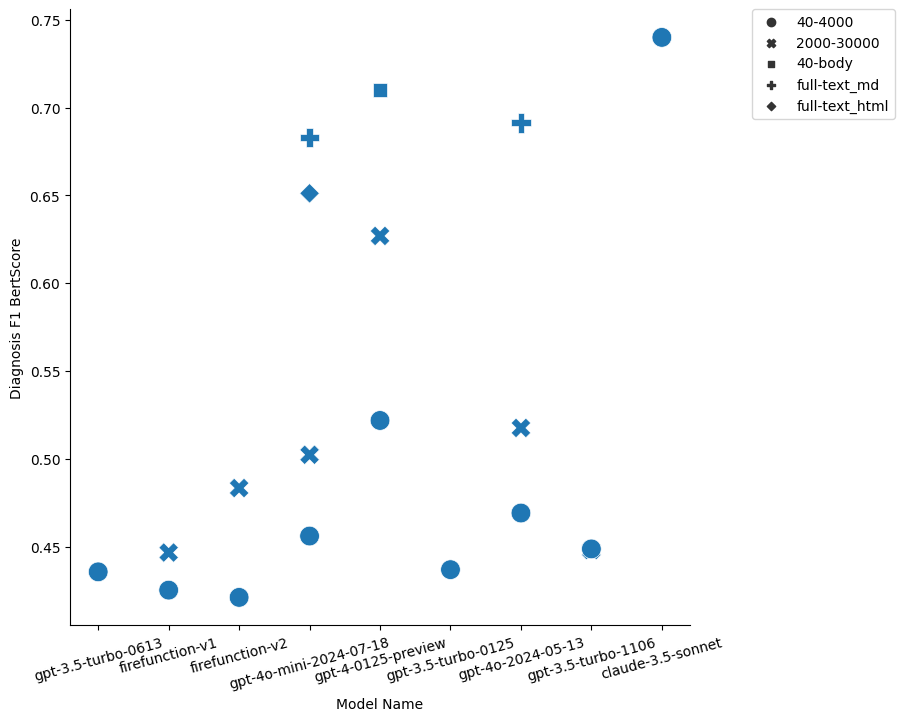

In [82]:
plt.figure(figsize=(8, 8))
g = sns.scatterplot(data=f1, x='model_name', y='score',
                    style='strategy', sizes=(10, 264))
g.set_ylabel('Diagnosis F1 BertScore')
g.set_xlabel('Model Name')
g.collections[0].set_sizes([200])
sns.despine()
plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0)
plt.xticks(rotation=15)

In [77]:
model_order = ['firefunction-v2', 'gpt-3.5-turbo-1106', 'gpt-4-0125-preview', 'gpt-4o-mini-2024-07-18', 'gpt-4o-2024-05-13', 'claude-3.5-sonnet']
f1_subset = f1[f1.model_name.isin(model_order)]
f1['model_name'] = pd.Categorical(f1['model_name'], categories=model_order, ordered=True)


/tmp/ipykernel_41807/1263136026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['model_name'] = pd.Categorical(f1['model_name'], categories=model_order, ordered=True)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'firefunction-v2'),
  Text(1, 0, 'gpt-3.5-turbo-1106'),
  Text(2, 0, 'gpt-4-0125-preview'),
  Text(3, 0, 'gpt-4o-mini-2024-07-18'),
  Text(4, 0, 'gpt-4o-2024-05-13'),
  Text(5, 0, 'claude-3.5-sonnet')])

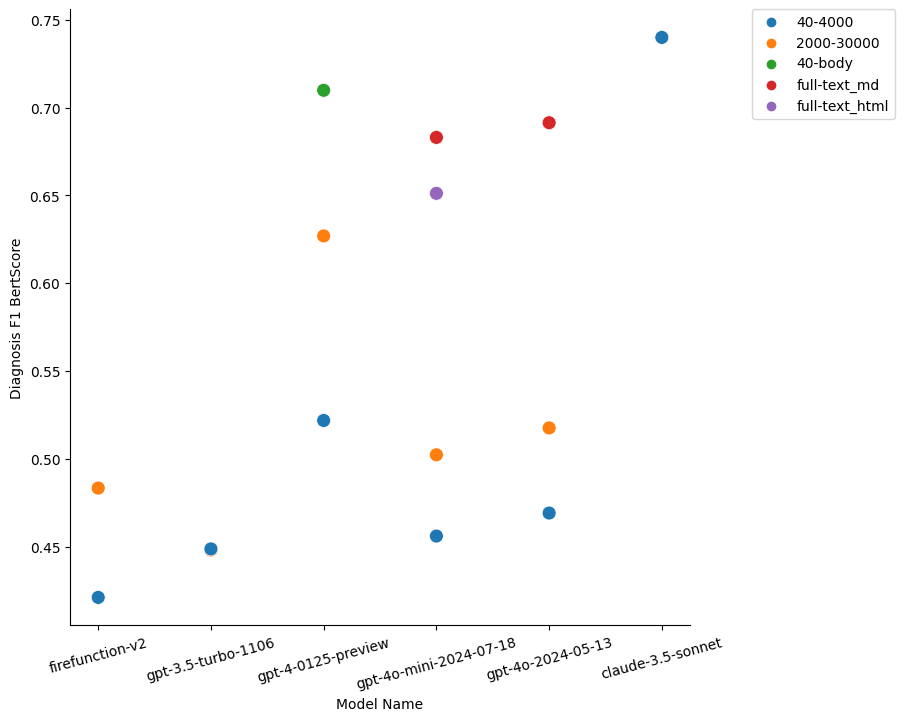

In [78]:
plt.figure(figsize=(8, 8))
g = sns.scatterplot(data=f1, x='model_name', y='score',
                    hue='chunking_strategy', sizes=(10, 264))
g.set_ylabel('Diagnosis F1 BertScore')
g.set_xlabel('Model Name')
g.collections[0].set_sizes([100])
sns.despine()
plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0)
plt.xticks(rotation=15)